In [1]:
%matplotlib inline


# Watershed segmentation


The watershed is a classical algorithm used for **segmentation**, that
is, for separating different objects in an image.

Starting from user-defined markers, the watershed algorithm treats
pixels values as a local topography (elevation). The algorithm floods
basins from the markers until basins attributed to different markers
meet on watershed lines.  In many cases, markers are chosen as local
minima of the image, from which basins are flooded.

In the example below, two overlapping circles are to be separated. To
do so, one computes an image that is the distance to the
background. The maxima of this distance (i.e., the minima of the
opposite of the distance) are chosen as markers and the flooding of
basins from such markers separates the two circles along a watershed
line.

See Wikipedia_ for more details on the algorithm.



In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ndi

from skimage.segmentation import watershed
from skimage.feature import peak_local_max

from PIL import Image

from skimage.filters import rank
from skimage.util import img_as_ubyte
from scipy import ndimage as ndi

from skimage.morphology import disk
import cv2

#### Primeiro temos que ler a imagem original e certificarmos que foi lida corretamente.

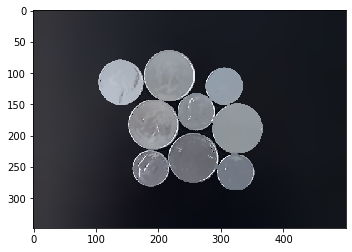

In [8]:
raw_image = cv2.imread('input.jpg')
raw_image_filtered = cv2.pyrMeanShiftFiltering(raw_image, 21, 51)
plt.imshow(raw_image_filtered)
plt.show()

#### Agora temos que converter esta imagem para grayscale e para podermos usar o algoritimo

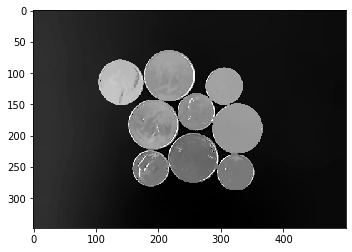

In [9]:
gray_image = cv2.cvtColor(np.asarray(raw_image_filtered), cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image, cmap = plt.get_cmap('gray'))
plt.show()


#### Mas como podemos perceber 

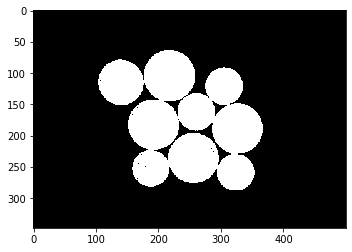

In [10]:
input_image = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
plt.imshow(thresh, cmap = plt.get_cmap('gray'))
plt.show()

#### Por fim vamos aplicar o o algoritimo implementado pelo Scikit Image mas antes termos que converter a imagem para um numpy array.

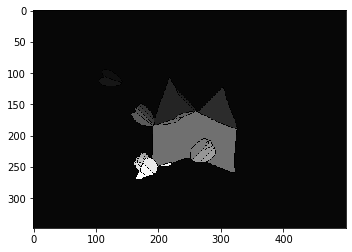

In [11]:
watershed_output = watershed(input_image, watershed_line=True, compactness=10)
plt.imshow(watershed_output, cmap = plt.get_cmap('gray'))
plt.show()
